<a href="https://colab.research.google.com/github/PrayashMishra022/PRODIGY-ML-04/blob/main/PRODIGY_ML_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

!mkdir ~/.kaggle

!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 99% 2.11G/2.13G [00:24<00:00, 104MB/s]
100% 2.13G/2.13G [00:24<00:00, 92.1MB/s]


In [ ]:
!unzip /content/leapgestrecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [ ]:
pip install tensorflow


In [9]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define dataset path (update if needed)
dataset_path = "/content/leapGestRecog"  # Example: "C:/Users/YourName/leapgestrecog"

# Define image properties
IMG_SIZE = 128  # Resize images to 128x128
NUM_CLASSES = 10  # 10 different hand gestures

# Initialize lists for data and labels
data = []
labels = []
subject_folders = sorted(os.listdir(dataset_path))  # Sort subjects (00, 01, ..., 09)

# Mapping gestures to numerical labels
gesture_mapping = {}  # Gesture folder names → Numeric labels
gesture_index = 0

# Loop through subjects
for subject in subject_folders:
    subject_path = os.path.join(dataset_path, subject)

    if os.path.isdir(subject_path):  # Ensure it's a folder
        gesture_folders = sorted(os.listdir(subject_path))  # Sort gesture types

        for gesture in gesture_folders:
            gesture_path = os.path.join(subject_path, gesture)

            if os.path.isdir(gesture_path):  # Ensure it's a folder
                if gesture not in gesture_mapping:
                    gesture_mapping[gesture] = gesture_index
                    gesture_index += 1

                # Read images inside the gesture folder
                for img_name in os.listdir(gesture_path):
                    img_path = os.path.join(gesture_path, img_name)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to 128x128
                    data.append(img)
                    labels.append(gesture_mapping[gesture])

# Convert lists to NumPy arrays
data = np.array(data).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0  # Normalize
labels = np.array(labels)

print(f"✅ Total images processed: {len(data)}")
print(f"✅ Gesture classes mapped: {gesture_mapping}")

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
y_train, y_test = to_categorical(y_train, NUM_CLASSES), to_categorical(y_test, NUM_CLASSES)

# Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Save Model
model.save("gesture_model.h5")
print("✅ Model saved as gesture_model.h5")

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"🎯 Test Accuracy: {test_acc * 100:.2f}%")


✅ Total images processed: 20000
✅ Gesture classes mapped: {'01_palm': 0, '02_l': 1, '03_fist': 2, '04_fist_moved': 3, '05_thumb': 4, '06_index': 5, '07_ok': 6, '08_palm_moved': 7, '09_c': 8, '10_down': 9}
Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 412s 820ms/step - accuracy: 0.7314 - loss: 0.8248 - val_accuracy: 0.9967 - val_loss: 0.0127
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 426s 788ms/step - accuracy: 0.9873 - loss: 0.0445 - val_accuracy: 0.9995 - val_loss: 0.0023
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 402s 804ms/step - accuracy: 0.9895 - loss: 0.0309 - val_accuracy: 0.9992 - val_loss: 0.0017
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 426s 772ms/step - accuracy: 0.9922 - loss: 0.0251 - val_accuracy: 1.0000 - val_loss: 3.7336e-04
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 402s 804ms/step - accuracy: 0.9944 - loss: 0.0181 - val_accuracy: 0.9995 - val_loss: 0.0015
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 441s 802ms/step - accuracy: 0.9959 - loss: 0.0121 - val_accuracy: 0.9998 - val_loss: 0.0012

✅ Model saved as gesture_model.h5
125/125 ━━━━━━━━━━━━━━━━━━━━ 26s 208ms/step - accuracy: 0.9996 - loss: 7.7009e-04
🎯 Test Accuracy: 99.92%


In [11]:
# Save Model
model.save("gesture_model.keras")
print("✅ Model saved as gesture_model.keras")

✅ Model saved as gesture_model.keras


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


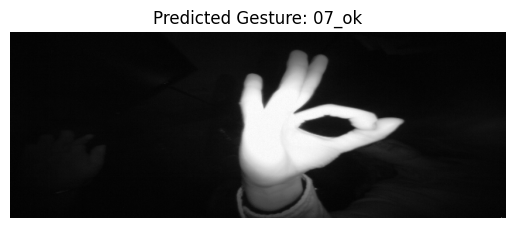

✅ The model predicted: 07_ok
✅ Confidence Scores: [8.2582054e-35 8.2029359e-30 8.4252162e-38 1.4308922e-32 6.4687130e-31
 1.8389083e-24 1.0000000e+00 4.6675182e-28 6.8023566e-18 1.3503275e-21]
✅ Tested image path: /content/leapGestRecog/00/07_ok/frame_00_07_0179.png


In [16]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# ✅ Update this with your extracted dataset path
dataset_path = "/content/leapGestRecog"  # Ensure this is the correct path

# ✅ Load the trained model
model = load_model("gesture_model.keras")  # Ensure model path is correct

# ✅ Define image properties
IMG_SIZE = 128  # Resize images to 128x128

# ✅ Gesture mapping (same as in training)
gesture_mapping = {
    "01_palm": 0, "02_l": 1, "03_fist": 2, "04_fist_moved": 3, "05_thumb": 4,
    "06_index": 5, "07_ok": 6, "08_palm_moved": 7, "09_c": 8, "10_down": 9
}
gesture_labels = {v: k for k, v in gesture_mapping.items()}  # Reverse mapping

# ✅ Select a random test image from the dataset
subject_folder = np.random.choice(os.listdir(dataset_path))  # Pick a subject
subject_path = os.path.join(dataset_path, subject_folder)

gesture_folder = np.random.choice(os.listdir(subject_path))  # Pick a gesture
gesture_path = os.path.join(subject_path, gesture_folder)

test_image = np.random.choice(os.listdir(gesture_path))  # Pick a random image
test_image_path = os.path.join(gesture_path, test_image)

# ✅ Load and preprocess the test image
img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
img_reshaped = img_resized.reshape(1, IMG_SIZE, IMG_SIZE, 1)  # Reshape for model

# ✅ Make prediction
prediction = model.predict(img_reshaped)
predicted_label = np.argmax(prediction)
predicted_gesture = gesture_labels[predicted_label]

# ✅ Display the test image with prediction
plt.imshow(img, cmap="gray")
plt.title(f"Predicted Gesture: {predicted_gesture}")
plt.axis("off")
plt.show()

print(f"✅ The model predicted: {predicted_gesture}")
print(f"✅ Confidence Scores: {prediction[0]}")
print(f"✅ Tested image path: {test_image_path}")



📂 Available Images for Testing:
1. /content/leapGestRecog/00/01_palm/frame_00_01_0114.png
2. /content/leapGestRecog/00/01_palm/frame_00_01_0198.png
3. /content/leapGestRecog/00/01_palm/frame_00_01_0136.png
4. /content/leapGestRecog/00/01_palm/frame_00_01_0104.png
5. /content/leapGestRecog/00/01_palm/frame_00_01_0162.png
6. /content/leapGestRecog/00/01_palm/frame_00_01_0076.png
7. /content/leapGestRecog/00/01_palm/frame_00_01_0074.png
8. /content/leapGestRecog/00/01_palm/frame_00_01_0191.png
9. /content/leapGestRecog/00/01_palm/frame_00_01_0051.png
10. /content/leapGestRecog/00/01_palm/frame_00_01_0150.png
11. /content/leapGestRecog/00/01_palm/frame_00_01_0176.png
12. /content/leapGestRecog/00/01_palm/frame_00_01_0119.png
13. /content/leapGestRecog/00/01_palm/frame_00_01_0098.png
14. /content/leapGestRecog/00/01_palm/frame_00_01_0192.png
15. /content/leapGestRecog/00/01_palm/frame_00_01_0066.png
16. /content/leapGestRecog/00/01_palm/frame_00_01_0140.png
17. /content/leapGestRecog/00/01

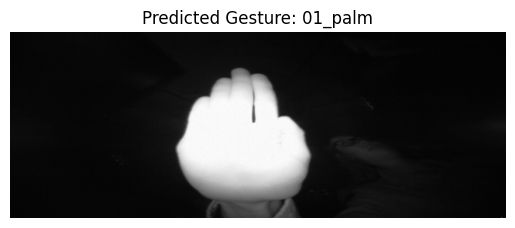

✅ The model predicted: 01_palm
✅ Confidence Scores: [1.0000000e+00 5.6941620e-14 1.4559764e-12 7.4099154e-15 2.2315161e-22
 4.6104719e-18 2.3118619e-14 3.0376006e-09 1.8215037e-12 1.5034923e-16]
✅ Tested image path: /content/leapGestRecog/00/01_palm/frame_00_01_0077.png


In [17]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# ✅ Update this with your extracted dataset path
dataset_path = "/content/leapGestRecog"  # Update if needed

# ✅ Load the trained model
model_path = "gesture_model.keras"  # Update if needed
model = load_model(model_path)

# ✅ Define image properties
IMG_SIZE = 128  # Resize images to 128x128

# ✅ Gesture mapping (same as in training)
gesture_mapping = {
    "01_palm": 0, "02_l": 1, "03_fist": 2, "04_fist_moved": 3, "05_thumb": 4,
    "06_index": 5, "07_ok": 6, "08_palm_moved": 7, "09_c": 8, "10_down": 9
}
gesture_labels = {v: k for k, v in gesture_mapping.items()}  # Reverse mapping

# ✅ Get list of all images
all_images = []
for subject in sorted(os.listdir(dataset_path)):  # Iterate over subjects (00, 01, ...)
    subject_path = os.path.join(dataset_path, subject)
    if os.path.isdir(subject_path):
        for gesture in sorted(os.listdir(subject_path)):  # Iterate over gestures (01_palm, 02_l, ...)
            gesture_path = os.path.join(subject_path, gesture)
            if os.path.isdir(gesture_path):
                for img_file in os.listdir(gesture_path):
                    img_path = os.path.join(gesture_path, img_file)
                    all_images.append(img_path)

# ✅ Show available images and let user pick one
print("\n📂 Available Images for Testing:")
for i, img in enumerate(all_images[:50]):  # Display first 50 images for selection
    print(f"{i + 1}. {img}")

# ✅ Get user input
choice = int(input("\n🔢 Enter the number of the image you want to test: ")) - 1

# ✅ Validate input
if 0 <= choice < len(all_images):
    test_image_path = all_images[choice]
else:
    print("❌ Invalid selection! Choosing a random image instead.")
    test_image_path = np.random.choice(all_images)

# ✅ Load and preprocess the chosen image
img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
img_reshaped = img_resized.reshape(1, IMG_SIZE, IMG_SIZE, 1)  # Reshape for model

# ✅ Make prediction
prediction = model.predict(img_reshaped)
predicted_label = np.argmax(prediction)
predicted_gesture = gesture_labels[predicted_label]

# ✅ Display the selected image with prediction
plt.imshow(img, cmap="gray")
plt.title(f"Predicted Gesture: {predicted_gesture}")
plt.axis("off")
plt.show()

print(f"✅ The model predicted: {predicted_gesture}")
print(f"✅ Confidence Scores: {prediction[0]}")
print(f"✅ Tested image path: {test_image_path}")
